<a href="https://colab.research.google.com/github/FatemehAbbasi166/Data-Engineering/blob/main/Data_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gathering Data Example
Retrieve data from Scikit learn

In [1]:
from sklearn.datasets import fetch_california_housing

In [2]:
# fetch the dataset

In [3]:
import pandas as pd

In [4]:
dataset= fetch_california_housing()

In [5]:
housing_data= pd.DataFrame(dataset.data)

In [6]:
housing_data.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20640 non-null  float64
 1   1       20640 non-null  float64
 2   2       20640 non-null  float64
 3   3       20640 non-null  float64
 4   4       20640 non-null  float64
 5   5       20640 non-null  float64
 6   6       20640 non-null  float64
 7   7       20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [8]:
housing_data.shape

(20640, 8)

In [9]:
from sklearn.datasets import fetch_california_housing

In [11]:
housing= fetch_california_housing()

In [12]:
print(housing.data.shape, housing.target.shape)

(20640, 8) (20640,)


In [13]:
print(housing.feature_names[0:6])

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']


In [14]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


# Handle missing data

In [15]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from math import sqrt
import random
import numpy as np
random.seed(0)

In [16]:
# Fetch the dataset
import pandas as pd
dataset= fetch_california_housing()
train, target=pd.DataFrame(dataset.data),pd.DataFrame(dataset.target)
train.columns=['zero','one','two','three','four','five','six','seven']
train.insert(loc=len(train.columns), column='target', value=target)


In [17]:
# Randomly replace 40% of the first column with Nan values
column=train['zero']
missing_pct=int(column.size*0.4)
i= [random.choice(range(column.shape[0])) for _ in range(missing_pct)]
column[i]=np.NaN
train

,zero,one,two,three,four,five,six,seven,target
0,NaN,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,NaN,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,NaN,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,NaN,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [18]:
# Remove observation that have missing values.
# Will drop all rows that have any missing values.
train.dropna(inplace=True)
train.shape

(13783, 9)

In [19]:
train

,zero,one,two,three,four,five,six,seven,target
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611
...,...,...,...,...,...,...,...,...,...
20633,2.5495,27.0,5.445026,1.078534,1082.0,2.832461,39.19,-121.53,0.983
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923


In [20]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from math import sqrt
import random
import numpy as np
random.seed(0)
# Fetch the dataset
import pandas as pd
dataset= fetch_california_housing()
train, target=pd.DataFrame(dataset.data),pd.DataFrame(dataset.target)
train.columns=['zero','one','two','three','four','five','six','seven']
train.insert(loc=len(train.columns), column='target', value=target)
# Randomly replace 40% of the first column with Nan values
column=train['zero']
missing_pct=int(column.size*0.4)
i= [random.choice(range(column.shape[0])) for _ in range(missing_pct)]
column[i]=np.NaN
train

,zero,one,two,three,four,five,six,seven,target
0,NaN,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,NaN,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,NaN,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,NaN,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [21]:
# Impute the values using scikit-learn SimpleImpute Class
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan, strategy='most_frequent') # For options other than mean imputation replace 'mean', 'mediant', 'constant'
imputer= imputer.fit(train[['zero']])
train['zero']= imputer.transform(train[['zero']]).ravel()
train

,zero,one,two,three,four,five,six,seven,target
0,3.1250,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,3.1250,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.1250,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,3.1250,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [22]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from math import sqrt
import random
import numpy as np
random.seed(0)
# Fetch the dataset
import pandas as pd
dataset= fetch_california_housing()
train, target=pd.DataFrame(dataset.data),pd.DataFrame(dataset.target)
train.columns=['zero','one','two','three','four','five','six','seven']
train.insert(loc=len(train.columns), column='target', value=target)
# Randomly replace 40% of the first column with Nan values
column=train['zero']
missing_pct=int(column.size*0.4)
i= [random.choice(range(column.shape[0])) for _ in range(missing_pct)]
column[i]=np.NaN
train

,zero,one,two,three,four,five,six,seven,target
0,NaN,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,NaN,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,NaN,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,NaN,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [23]:
# Impute the values using scikit-learn KNNImputer calss
#Install the KNNImputer pip package in the current Jupiter kernel
#import sys
#!{sys.executable} -m pip install --upgrade pip
#!{sys.executable} -m pip install missingpy
#from missingpy import KNNImputer
from sklearn.impute import KNNImputer
# Replace missing feature values using K-Nearest Neighbors
imputer= KNNImputer(n_neighbors=2, weights='uniform')
imputer.fit_transform (train[['zero']])
train['zero']= imputer. transform(train[['zero']]).ravel()
train

,zero,one,two,three,four,five,six,seven,target
0,3.87794,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.30140,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,3.87794,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.64310,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.87794,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.56030,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.55680,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.70000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,3.87794,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


# Feature Selection and Feature Extraction.

In [24]:
# Load Dataset
import pandas as pd
url='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
# Load dataset into pandas DataFrame
df= pd.read_csv(url, names=['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [25]:
import numpy as np
import pandas as pd
data= np.array([[0,2,0,0],[0,1,4,0],[0,1,1,0]])
data_raw=pd.DataFrame({'column1':data[:,0],'column2':data[:,1],'column3':data[:,2], 'column4':data[:,3]})
data_raw

,column1,column2,column3,column4
0,0,2,0,0
1,0,1,4,0
2,0,1,1,0


In [26]:
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
# Normalize the data attributes
normalized_data= preprocessing.normalize(data)
dataset= pd.DataFrame({'column1':normalized_data[:,0],'column2':normalized_data[:,1],'column3':normalized_data[:,2], 'column4':normalized_data[:,3]})
dataset

,column1,column2,column3,column4
0,0.0,1.000000,0.000000,0.0
1,0.0,0.242536,0.970143,0.0
2,0.0,0.707107,0.707107,0.0


In [27]:
selctor=VarianceThreshold()
feature_selected= selctor.fit_transform(normalized_data)
print(feature_selected)

[[1.         0.        ]
 [0.24253563 0.9701425 ]
 [0.70710678 0.70710678]]


In [28]:
dataset= pd.DataFrame({'column2':normalized_data[:,1],'column3':normalized_data[:,2]})
dataset

,column2,column3
0,1.000000,0.000000
1,0.242536,0.970143
2,0.707107,0.707107


In [29]:
url='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
#Load dataset into pandas DataFrame
df= pd.read_csv(url, names=['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [30]:
from sklearn.preprocessing import StandardScaler
features=['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x=df.loc[:, features].values
#Seprating out the target
y=df.loc[:,['target']].values
#Standarding the features
x=StandardScaler().fit_transform(x)
xdf=pd.DataFrame({'sepal length':x[:,0],'sepal width':x[:,1],'petal length':x[:,2], 'petal width':x[:,3]})
xdf

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [31]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
principalComponents=pca.fit_transform(x)
principalDf=pd.DataFrame(data=principalComponents, columns=['principal component 1','principal component 2'])
principalDf

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


In [32]:
finalDf=pd.concat([principalDf, df[['target']]], axis=1)
finalDf

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
...,...,...,...
145,1.870522,0.382822,Iris-virginica
146,1.558492,-0.905314,Iris-virginica
147,1.520845,0.266795,Iris-virginica
148,1.376391,1.016362,Iris-virginica


# Let's Visualize Data

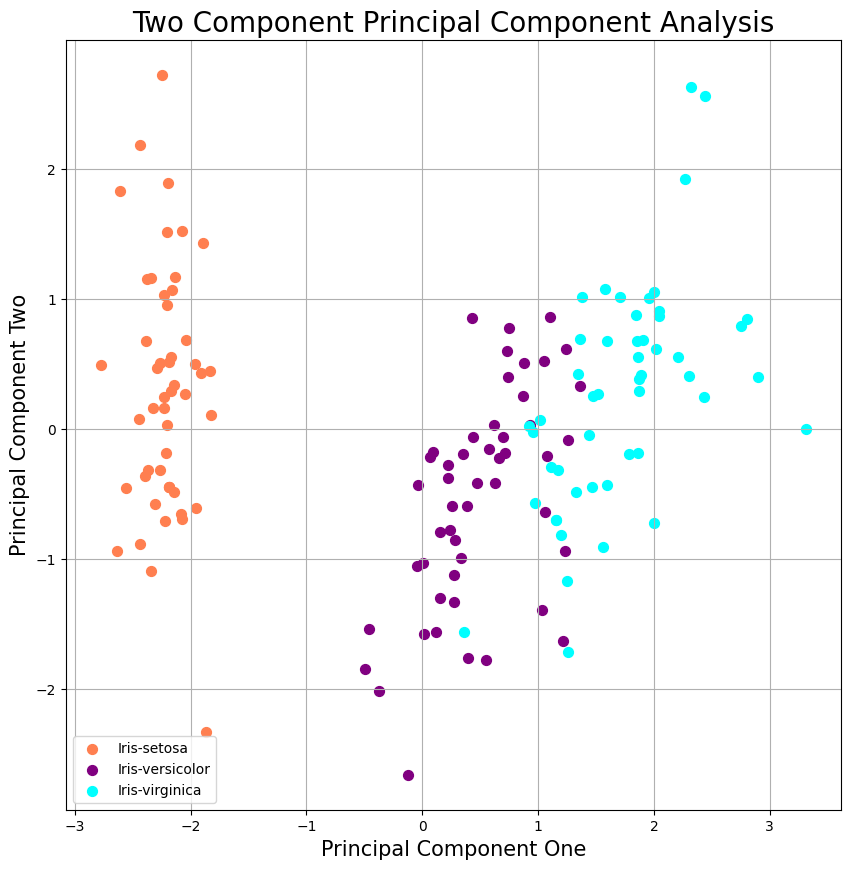

In [33]:
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(10,10))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component One', fontsize=15)
ax.set_ylabel('Principal Component Two', fontsize=15)
ax.set_title('Two Component Principal Component Analysis', fontsize=20)
targets=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors=['coral','purple', 'aqua']
for target, color in zip(targets, colors):
  indicesToKeep= finalDf['target']==target
  ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
             ,finalDf.loc[indicesToKeep, 'principal component 2']
             ,c=color
             ,s=50)
  ax.legend(targets)
  ax.grid()


In [34]:
variance_ratio=pca.explained_variance_ratio_
variance_ratio

array([0.72770452, 0.23030523])

In [35]:
total_variance=variance_ratio[0]+variance_ratio[1]
total_variance

0.9580097536148197

# Now we want to show how to use PCA to improve the performance of training the model.

We are going to MNIST dataset from the sklearn set of sample data sets.
This is  a dataset that has digital representation of handwritten numbers.

In [36]:
from sklearn.datasets import fetch_openml

# Load MNIST dataset
mnist = fetch_openml('mnist_784')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import time
#Split data between train and test
train_img, test_img, train_lbl, test_lbl=train_test_split(mnist.data, mnist.target, test_size=1/7.0)
scalar=StandardScaler() #before PCA
#Fit training set only
scalar.fit(train_img)
#Apply transform to both training and test sets
train_img=scalar.transform(train_img)
test_img=scalar.transform(test_img)
#Make an instance of the model
pca=PCA(0.85)
#PCA fit
pca.fit(train_img)
#How many components did PCA choose?
print('\number of components:%s\n'%pca.n_components_)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(



umber of components:183



In [37]:
#Transform both train and test datasets
train_img=pca.transform(train_img)
test_img=pca.transform(test_img)
#Default solver is very slow, use 'lbfgs'
logisticRegr=LogisticRegression(solver='lbfgs')
#train the model
start_time=time.time()
logisticRegr.fit(train_img,train_lbl)
finish_time=time.time()
#Predict for Ten Observations (Image)
logisticRegr.predict(test_img[0:10])
#Measure Performance
logisticRegr.score(test_img,test_lbl)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9229

In [38]:
run_time=finish_time-start_time
run_time

8.087282657623291

In [39]:
from sklearn.datasets import fetch_openml

# Load MNIST dataset
mnist = fetch_openml('mnist_784')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import time
#Split data between train and test
train_img, test_img, train_lbl, test_lbl=train_test_split(mnist.data, mnist.target, test_size=1/7.0)
scalar=StandardScaler()
#Fit training set only
scalar.fit(train_img)
#Apply transform to both training and test sets
train_img=scalar.transform(train_img)
test_img=scalar.transform(test_img)
#Make an instance of the model
pca=PCA(0.95) #new
#PCA fit
pca.fit(train_img)
#How many components did PCA choose?
print('\number of components:%s\n'%pca.n_components_)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(



umber of components:329



In [40]:
#Transform both train and test datasets
train_img=pca.transform(train_img)
test_img=pca.transform(test_img)
#Default solver is very slow, use 'lbfgs'
logisticRegr=LogisticRegression(solver='lbfgs')
#train the model
start_time=time.time()
logisticRegr.fit(train_img,train_lbl)
finish_time=time.time()
#Predict for Ten Observations (Image)
logisticRegr.predict(test_img[0:10])
#Measure Performance
logisticRegr.score(test_img,test_lbl)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9182

In [41]:
run_time=finish_time-start_time
run_time

12.433017492294312

# Encoding Categorical Values_part1
Binarizer Encoding

In [43]:
#Classs to colorize, bold or underline output
class color:
  PURPLE='\033[95m'
  CYAN='\033[96m'
  DARKCYAN='\033[36m'
  BLUE='\033[94m'
  GREEN='\033[92m'
  YELLOW='\033[93m'
  RED='\033[91m'
  BOLD='\033[1m'
  UNDERLINE='\033[4m'
  END='\033[0m'
  #
import pandas as pd
import numpy as np
#Define header for our dataset, the UCI data set does not have a header
headers=['age', 'workclass','fnlwgt','education', 'education-num', 'marital-status', 'ocupation', 'relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country', 'income']
# Load the data from github repo and convert the values with '?' to NaN
url="https://raw.githubusercontent.com/vbloise3/WhizLabsML/master/CensusIncome/CensusIncomeDataset.csv"
df=pd.read_csv(url, header=None, names=headers, na_values='null')
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,ocupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [44]:
#Separate the features
features_df=df.drop('income', axis=1)
#separate the target
target_df=df.drop(df.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,13]], axis=1)
features_df

,age,workclass,fnlwgt,education,education-num,marital-status,ocupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [45]:
target_df

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
32556,<=50K
32557,>50K
32558,<=50K
32559,<=50K


In [46]:
#What data types are in dataset
features_df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
ocupation         object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
dtype: object

In [47]:
#Create a dataframe of only the categorical features
categorical_featuresDF=features_df.select_dtypes(include=['object']).copy()
categorical_featuresDF

,workclass,education,marital-status,ocupation,relationship,race,sex,native-country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States


In [48]:
#Find any null value entries in the categorical_features
categorical_featuresDF_NaN=categorical_featuresDF[categorical_featuresDF.isnull().any(axis=1)]
categorical_featuresDF_NaN

,workclass,education,marital-status,ocupation,relationship,race,sex,native-country
14,Private,Assoc-voc,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,NaN
27,NaN,Some-college,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,South
38,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,NaN
51,Private,HS-grad,Never-married,Other-service,Own-child,White,Female,NaN
61,NaN,7th-8th,Married-spouse-absent,NaN,Not-in-family,White,Male,NaN
...,...,...,...,...,...,...,...,...
32530,NaN,Bachelors,Married-civ-spouse,NaN,Wife,White,Female,United-States
32531,NaN,Bachelors,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,United-States
32539,NaN,Doctorate,Married-civ-spouse,NaN,Husband,White,Male,United-States
32541,NaN,HS-grad,Separated,NaN,Not-in-family,Black,Female,United-States


In [49]:
#Which features have a Nan values?
categorical_featuresDF.columns[categorical_featuresDF.isna().any()].tolist()

['workclass', 'ocupation', 'native-country']

In [50]:
#Impute the NaN values using sklearn SimpleImpute Class
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
# Impute workclass values
imputer=imputer.fit(features_df[['workclass']])
features_df['workclass']=imputer.transform(features_df[['workclass']]).ravel()
# Impute ocupation values
imputer=imputer.fit(features_df[['ocupation']])
features_df['ocupation']=imputer.transform(features_df[['ocupation']]).ravel()
# Impute native-country values
imputer=imputer.fit(features_df[['native-country']])
features_df['native-country']=imputer.transform(features_df[['native-country']]).ravel()
#Recreat the dataframe of only the categorical features
categorical_featuresDF= features_df.select_dtypes(include=['object']).copy()
#Recheck to find any null value entries in the categorical features
categorical_features_NaN=categorical_featuresDF[categorical_featuresDF.isnull().any(axis=1)]
#Which features have a NaN values?
categorical_featuresDF.columns[categorical_featuresDF.isna().any()].to_list()


[]

In [51]:
#Use binary encoding for the sex feature
from sklearn.preprocessing import LabelBinarizer
#How many different sex feature value types
print(color.BOLD+color.PURPLE+'\nHow many different sex feature types?'+color.END)
print(categorical_featuresDF['sex'].value_counts())


How many different sex feature types?
sex
 Male      21790
 Female    10771
Name: count, dtype: int64


In [52]:
label_style=LabelBinarizer()
label_results=label_style.fit_transform(categorical_featuresDF['sex'])
print(color.BOLD+color.PURPLE+'\nLabelBinarizer of sex feature'+color.END)
categorical_featuresDF['sex_code']=pd.DataFrame({'sex':label_results[:,0]})
categorical_featuresDF[['sex', 'sex_code']].head(15)


LabelBinarizer of sex feature


,sex,sex_code
0,Male,1
1,Male,1
2,Male,1
3,Male,1
4,Female,0
5,Female,0
6,Female,0
7,Male,1
8,Female,0
9,Male,1


In [53]:
#Perform label encoding on workclass feature
from sklearn.preprocessing import LabelEncoder
label_work_class= LabelEncoder()
categorical_featuresDF['workclass_code']=label_work_class.fit_transform(categorical_featuresDF['workclass'])
categorical_featuresDF[['workclass','workclass_code']].head(15)

,workclass,workclass_code
0,State-gov,6
1,Self-emp-not-inc,5
2,Private,3
3,Private,3
4,Private,3
5,Private,3
6,Private,3
7,Self-emp-not-inc,5
8,Private,3
9,Private,3


In [54]:
#Use one-hot encoding on the workclass feature
#How many different workclass feature value types
print(color.BOLD+color.PURPLE+'\nHow many different workclass feature types?'+color.END)
print(categorical_featuresDF['workclass'].value_counts())


How many different workclass feature types?
workclass
 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64


In [55]:
#One-hot encode the workclass feature
pd.get_dummies(categorical_featuresDF, columns=['workclass']).head()

,education,marital-status,ocupation,relationship,race,sex,native-country,sex_code,workclass_code,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay
0,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,1,6,False,False,False,False,False,False,True,False
1,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,1,5,False,False,False,False,False,True,False,False
2,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,1,3,False,False,False,True,False,False,False,False
3,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,1,3,False,False,False,True,False,False,False,False
4,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,0,3,False,False,False,True,False,False,False,False


In [56]:
#Use one-hot encoding on the marital-status feature
#How many different marital-status feature value types?
print(color.BOLD+color.PURPLE+'\nHow many marital-status feature types?'+color.END)
print(categorical_featuresDF['marital-status'].value_counts())
#One-hot encoding the marital-status feature
pd.get_dummies(categorical_featuresDF, columns=['marital-status']).head()


How many marital-status feature types?
marital-status
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: count, dtype: int64


,workclass,education,ocupation,relationship,race,sex,native-country,sex_code,workclass_code,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed
0,State-gov,Bachelors,Adm-clerical,Not-in-family,White,Male,United-States,1,6,False,False,False,False,True,False,False
1,Self-emp-not-inc,Bachelors,Exec-managerial,Husband,White,Male,United-States,1,5,False,False,True,False,False,False,False
2,Private,HS-grad,Handlers-cleaners,Not-in-family,White,Male,United-States,1,3,True,False,False,False,False,False,False
3,Private,11th,Handlers-cleaners,Husband,Black,Male,United-States,1,3,False,False,True,False,False,False,False
4,Private,Bachelors,Prof-specialty,Wife,Black,Female,Cuba,0,3,False,False,True,False,False,False,False


In [57]:
#Use one-hot encoding on the native-country feature
#How many different native-country feature value types?
print(color.BOLD+color.PURPLE+'\nHow many different native-country feature types?'+color.END)
print(categorical_featuresDF['native-country'].value_counts())
#One-hot encoding the native-country feature
pd.get_dummies(categorical_featuresDF, columns=['native-country']).head()


How many different native-country feature types?
native-country
 United-States                 29753
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru     

,workclass,education,marital-status,ocupation,relationship,race,sex,sex_code,workclass_code,native-country_ Cambodia,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,1,6,False,...,False,False,False,False,False,False,False,True,False,False
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,1,5,False,...,False,False,False,False,False,False,False,True,False,False
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,1,3,False,...,False,False,False,False,False,False,False,True,False,False
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,1,3,False,...,False,False,False,False,False,False,False,True,False,False
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,3,False,...,False,False,False,False,False,False,False,False,False,False


# Numerical Feature Engineering-Binning

In [58]:
#Class to colonize, bold, or underline output
class color:
  PURPLE='\033[95m'
  CYAN='\033[96m'
  DARKCYAN='\033[36m'
  BLUE='\033[94m'
  GREEN='\033[92m'
  YELLOW='\033[93m'
  RED='\033[91m'
  BOLD='\033[1m'
  UNDERLINE='\033[4m'
  END='\033[0m'
  #
import pandas as pd
import numpy as np
#Normalization, rescales the values into a range of [0,1]
data= np.array([[999999,2,0,9],[35,8,4,7],[27,23,1,99]])
data_raw=pd.DataFrame({'column1':data[:,0],'column2':data[:,1],'column3':data[:,2], 'column4':data[:,3]})
print(color.BOLD+color.PURPLE+'\nData before normalization'+color.END)
print(data_raw)
from sklearn import preprocessing
normalized_data= preprocessing.normalize(data)
dataset=pd.DataFrame({'column1':normalized_data[:,0],'column2':normalized_data[:,1],'column3':normalized_data[:,2], 'column4':normalized_data[:,3]})
print(color.BOLD+color.PURPLE+'\nData after normalization'+color.END)
print(dataset)



Data before normalization
   column1  column2  column3  column4
0   999999        2        0        9
1       35        8        4        7
2       27       23        1       99

Data after normalization
    column1   column2   column3   column4
0  1.000000  0.000002  0.000000  0.000009
1  0.951171  0.217411  0.108705  0.190234
2  0.256736  0.218701  0.009509  0.941364


In [59]:
#Standardization: rescales the date to have a mean of zero and standard deviation of one(unit variance)
from sklearn.preprocessing import StandardScaler
data= np.array([[999999,2,0,999],[35,1,4,7],[27,3,1,99]])
data_raw=pd.DataFrame({'column1':data[:,0],'column2':data[:,1],'column3':data[:,2], 'column4':data[:,3]})
print(color.BOLD+color.PURPLE+'\nData before standardization'+color.END)
print(data_raw)
standardized_data= StandardScaler().fit_transform(data_raw)
dataset=pd.DataFrame({'column1':standardized_data[:,0],'column2':standardized_data[:,1],'column3':standardized_data[:,2], 'column4':standardized_data[:,3]})
print(color.BOLD+color.PURPLE+'\nData after standardization'+color.END)
print(dataset)


Data before standardization
   column1  column2  column3  column4
0   999999        2        0      999
1       35        1        4        7
2       27        3        1       99

Data after standardization
    column1   column2   column3   column4
0  1.414214  0.000000 -0.980581  1.409224
1 -0.707098 -1.224745  1.372813 -0.807399
2 -0.707115  1.224745 -0.392232 -0.601825


In [60]:
#Categorical Binning Example:
countries= pd.Series(['United States',
                      'Canada',
                      'Spain',
                      'Italy',
                      'Chile',
                      'Brazil',
                      'North Korea',
                      'Vietnam',
                      'Thailand',
                      'Malaysia',
                      'Mayanmar',
                      'Iceland',
                      'Germany',
                      'Cuba',
                      'Maxico'],
                     name='Countries')
groups={
   'North America':('United States','Canada','Iceland','Greenland','Maxico'),
   'Europe':('France','Germany','United Kingdam', 'Belgium','Spain','Italy','Poland'),
   'South America':('Chile','Brazil', 'Peru','Colombia','Ecuador'),
   'Asia':('North Korea', 'Vietnam', 'Thailand', 'Malaysia','Mayanmar')}
from typing import Any
def country_group_map(series:pd.Series, groups:dict, othervalue: Any=-1) -> pd.Series:
  #Assign the dictionary pairs
  groups={z:j for j,r in groups.items() for z in r}
  return series.map(groups).fillna(othervalue)

grouped_countries=country_group_map(countries, groups, othervalue='other')
df= pd.concat([countries.rename('Countries'),grouped_countries.rename('Grouped Countries')], axis=1)
print(color.BOLD+color.PURPLE+'\nCountry by region'+color.END)
df


Country by region


,Countries,Grouped Countries
0,United States,North America
1,Canada,North America
2,Spain,Europe
3,Italy,Europe
4,Chile,South America
5,Brazil,South America
6,North Korea,Asia
7,Vietnam,Asia
8,Thailand,Asia
9,Malaysia,Asia


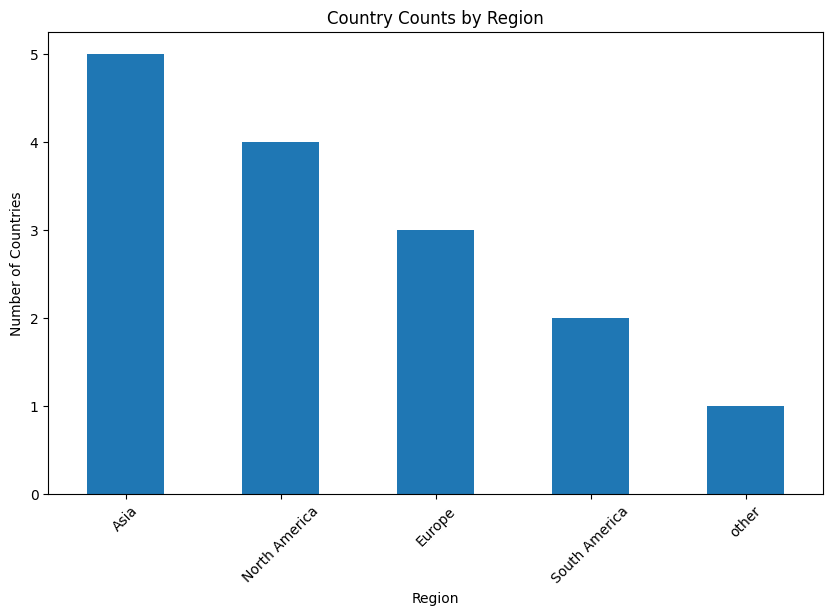

In [64]:
import matplotlib.pyplot as plt

# Assuming 'Grouped Countries' is the column containing region/group information
data = df['Grouped Countries'].value_counts()

# Plot the counts of countries in each region
plt.figure(figsize=(10, 6))
data.plot(kind='bar', rot=45)
plt.title('Country Counts by Region')
plt.xlabel('Region')
plt.ylabel('Number of Countries')
plt.show()


In [65]:
import pandas as pd
import numpy as np
import seaborn as sns

# Numerical Binning Example
from google.colab import files
uploaded = files.upload()



Saving 201_Revenue_Total.xlsx to 201_Revenue_Total.xlsx


In [66]:
revenue_df=pd.read_excel('201_Revenue_Total.xlsx')
print(color.BOLD+color.PURPLE+'\nNumber of observations:'+str(len(revenue_df.index))+color.END)
revenue_df


Number of observations:1507


,reference number,name,price,date
0,740150,Thomas LLC,3380.91,2018-01-01 07:21:51
1,714466,Sillians-Krapfs,-63.16,2018-01-01 10:00:47
2,218895,Snodgrass Inc,2086.10,2018-01-01 13:24:58
3,307599,"Craut, Oniote and Johnson",863.05,2018-01-01 15:05:22
4,412290,Judais-Pewrters,499.26,2018-01-01 23:26:55
...,...,...,...,...
1502,424914,Green-Brown,1582.49,2018-11-27 14:29:02
1503,424914,Green-Brown,1049.28,2018-12-19 15:15:41
1504,424914,Green-Brown,2166.75,2018-12-29 13:03:54
1505,424914,Green-Brown,1915.00,2018-12-22 03:31:36


<Axes: ylabel='Frequency'>

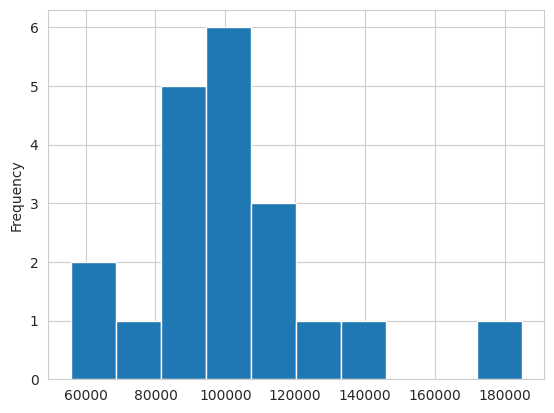

In [67]:
#Bin Continuous dates by using a simple histogram
sns.set_style('whitegrid')
df=revenue_df.groupby(['reference number', 'name'])['price'].sum().reset_index()
df['price'].plot(kind='hist')

In [68]:
#Quantile binning example
print(color.BOLD+color.PURPLE+'\nqcut: a quantile-based discretization function that divides up the data into equal sized bins'+color.END)
print(df['price'].describe())
df['quantile_price_quartiles']=pd.qcut(df['price'], q=4)
df['quantile_price_deciles']=pd.qcut(df['price'], q=10, precision=0)
bins_labels_5=['Rookie', 'Sophomore', 'Junior', 'Senior','Professional']
df['quantile_price_quiniles']=pd.qcut(df['price'], q=[0, 0.2,0.4,0.6, 0.8,1], labels=bins_labels_5)
print(color.BOLD+color.PURPLE+'\nThree examples: quartiles, deciles, quintiles'+color.END)
df.head()


qcut: a quantile-based discretization function that divides up the data into equal sized bins
count        20.000000
mean     101711.287500
std       27037.449673
min       55733.050000
25%       89137.707500
50%      100271.535000
75%      110132.552500
max      184793.700000
Name: price, dtype: float64

Three examples: quartiles, deciles, quintiles


,reference number,name,price,quantile_price_quartiles,quantile_price_deciles,quantile_price_quiniles
0,141962,Speilmans LLC,63626.03,"(55733.049000000006, 89137.708]","(55732.0, 76471.0]",Rookie
1,146832,Jones-Spank,99608.77,"(89137.708, 100271.535]","(95908.0, 100272.0]",Junior
2,163416,Muns-Kalifan,77898.21,"(55733.049000000006, 89137.708]","(76471.0, 87168.0]",Rookie
3,218895,Snodgrass Inc,137351.96,"(110132.552, 184793.7]","(124778.0, 184794.0]",Professional
4,239344,Finley LLC,91535.92,"(89137.708, 100271.535]","(90686.0, 95908.0]",Sophomore


In [69]:
#check the bin ranges
print(color.BOLD+color.PURPLE+'\nWhat ranges identify the bins?'+color.END)
results, bin_edges=pd.qcut(df['price'], q=[0, 0.2,0.4,0.6, 0.8,1], labels=bins_labels_5, retbins=True)
results_table=pd.DataFrame(zip(bin_edges,bins_labels_5), columns=['Threshold', 'Tier'])
print(results_table)
print(color.BOLD+color.PURPLE+'\nBins are of unequal size ...'+color.END)


What ranges identify the bins?
    Threshold          Tier
0   55733.050        Rookie
1   87167.958     Sophomore
2   95908.156        Junior
3  103605.970        Senior
4  112290.054  Professional

Bins are of unequal size ...


In [70]:
#Check the bin distribution
print(color.BOLD+color.PURPLE+'\nBin distribution:'+color.END)
print(df['quantile_price_quiniles'].value_counts())
print(color.BOLD+color.PURPLE+'\n... but the data is evenly distibuted across the bins'+color.END)


Bin distribution:
quantile_price_quiniles
Rookie          4
Sophomore       4
Junior          4
Senior          4
Professional    4
Name: count, dtype: int64

... but the data is evenly distibuted across the bins


In [71]:
#Use cut to define the bins edges:
#Remove the previous bins for simplicity
df=df.drop(columns=['quantile_price_quartiles','quantile_price_deciles','quantile_price_quiniles'])
#Use cut to split the data into 4 equal bin sizes
pd.cut (df['price'],bins=4)
#How was the data distributed?
print(color.BOLD+color.PURPLE+'\nAfter using cut to create 4 bins:'+color.END)
print(pd.cut(df['price'], bins=4).value_counts())
print(color.BOLD+color.PURPLE+'\nBins are of equal size, but the data is unevenly distibuted across the bins'+color.END)



After using cut to create 4 bins:
price
(87998.212, 120263.375]     12
(55603.989, 87998.212]       5
(120263.375, 152528.538]     2
(152528.538, 184793.7]       1
Name: count, dtype: int64

Bins are of equal size, but the data is unevenly distibuted across the bins


# Text Feature Editing-Bag-of-words:

In [72]:
#Bag of words:
from sklearn.feature_extraction.text import CountVectorizer
#Some Text
short_text=['The quick brown fox jumped over the lazy dog.']
#Create the vectorizer transformer
vectorizer= CountVectorizer()
#Tokenize and create the vocabulary
vectorizer.fit(short_text)
#show the vectorized vocabulary
print (vectorizer.vocabulary_)
#Encode the text
vector=vectorizer.transform(short_text)
#show the encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())


{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}
(1, 8)
<class 'scipy.sparse._csr.csr_matrix'>
[[1 1 1 1 1 1 1 2]]


# N-Gram

In [73]:
#N-Gram example
#Create the vectorizer transformer
ngram_vectorizer=CountVectorizer(analyzer='word',ngram_range=(1,3))
#Tokenize and create the vocabulary
counts=ngram_vectorizer.fit_transform(['The silly puppy ran all around the yard and the bit his owner!'])
#Check the results
print(ngram_vectorizer.get_feature_names_out())

['all' 'all around' 'all around the' 'and' 'and the' 'and the bit'
 'around' 'around the' 'around the yard' 'bit' 'bit his' 'bit his owner'
 'his' 'his owner' 'owner' 'puppy' 'puppy ran' 'puppy ran all' 'ran'
 'ran all' 'ran all around' 'silly' 'silly puppy' 'silly puppy ran' 'the'
 'the bit' 'the bit his' 'the silly' 'the silly puppy' 'the yard'
 'the yard and' 'yard' 'yard and' 'yard and the']


# Orthogonal Sparse Bigram

In [74]:
from sklearn.feature_extraction.text import CountVectorizer
#Bag-of-words example
# Some Text
short_text=['The aggressive brown beast exasperated the pedantic pontificator.']
#Create the vectorizer transformer
vectorizer=CountVectorizer()
#Tokenize and create the vocabulary
vectorizer.fit(short_text)
#Show the vectoriez vocabulary
print(vectorizer.vocabulary_)
#Encode the text
vector=vectorizer.transform(short_text)
#Show the encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())


{'the': 6, 'aggressive': 0, 'brown': 2, 'beast': 1, 'exasperated': 3, 'pedantic': 4, 'pontificator': 5}
(1, 7)
<class 'scipy.sparse._csr.csr_matrix'>
[[1 1 1 1 1 1 2]]
